In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [5]:
df.shape

(1143, 13)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
df.duplicated().sum()

0

<AxesSubplot:>

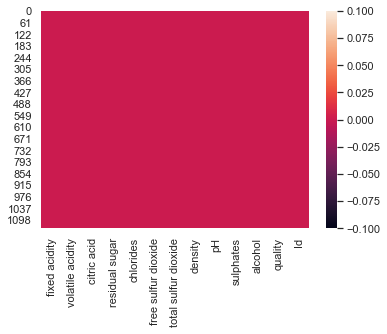

In [10]:
sns.heatmap(df.isnull())

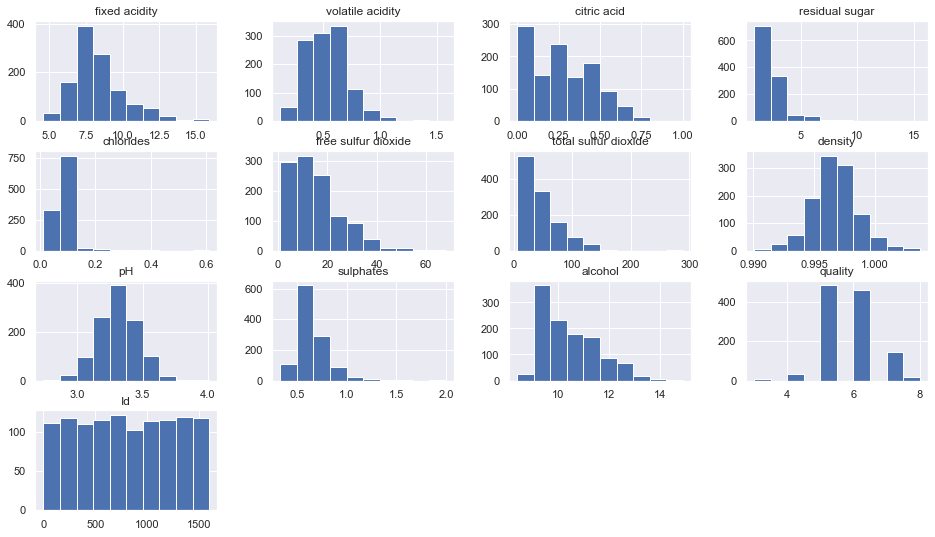

In [11]:
plt.figure
df.hist(figsize=(16,9))
plt.show()

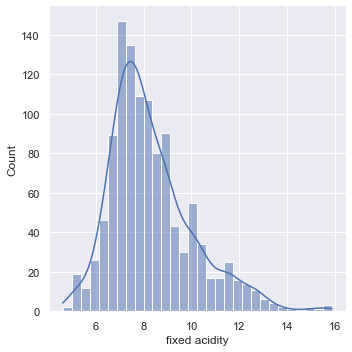

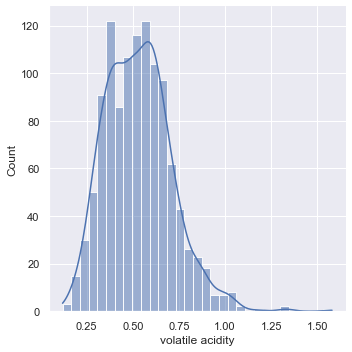

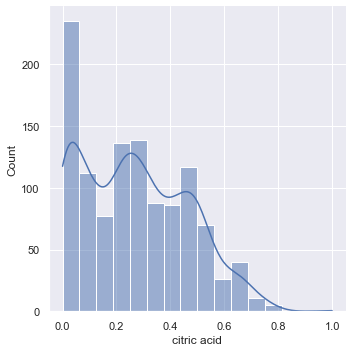

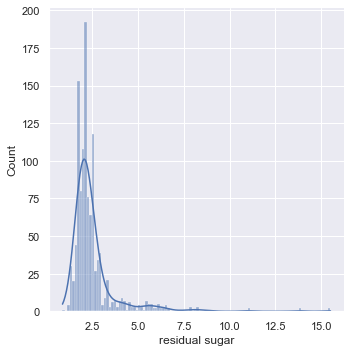

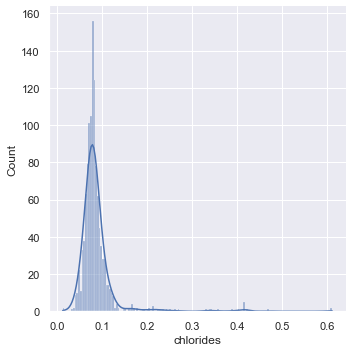

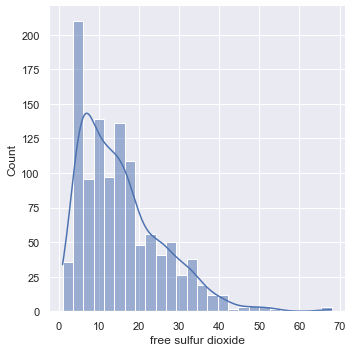

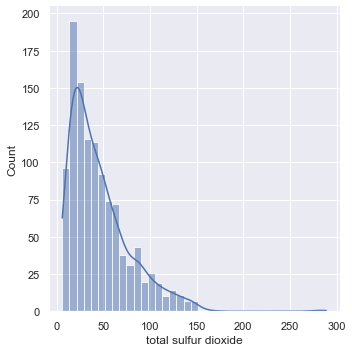

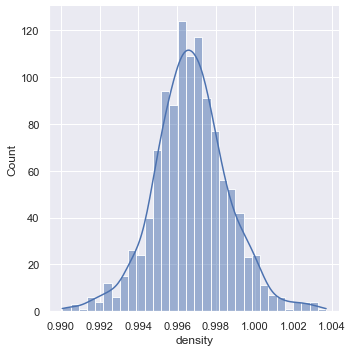

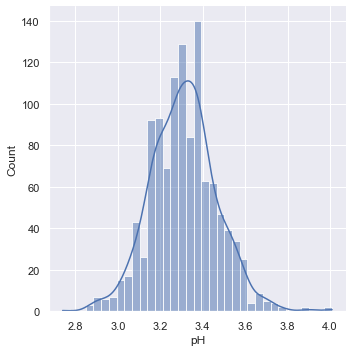

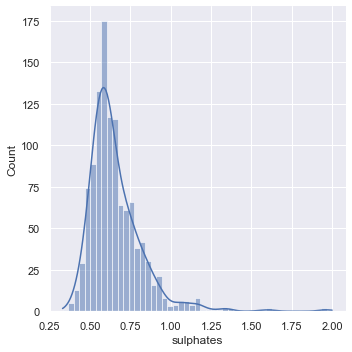

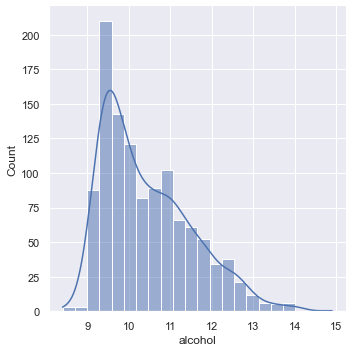

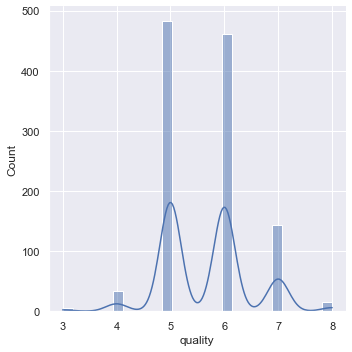

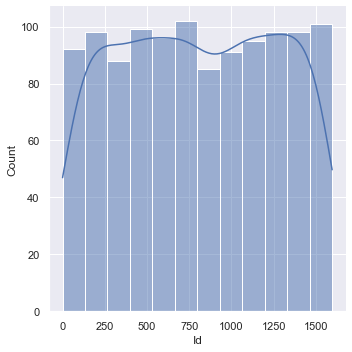

In [12]:
for col in df.columns:
    sns.displot(df[col],kde=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

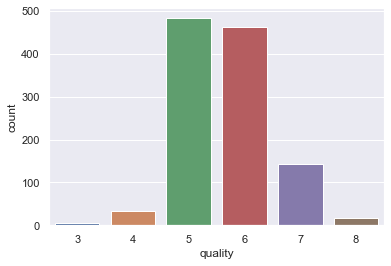

In [13]:
sns.countplot(df['quality'])

In [14]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [16]:
df.drop(columns=['residual sugar','free sulfur dioxide','Id','pH'],axis='columns',inplace=True)

<AxesSubplot:>

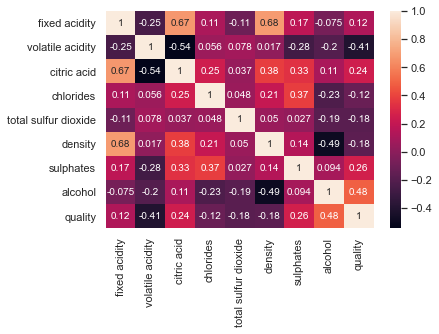

In [17]:
sns.heatmap(df.corr(),annot=True)

In [26]:
df.drop(columns=['density','citric acid'],inplace=True)

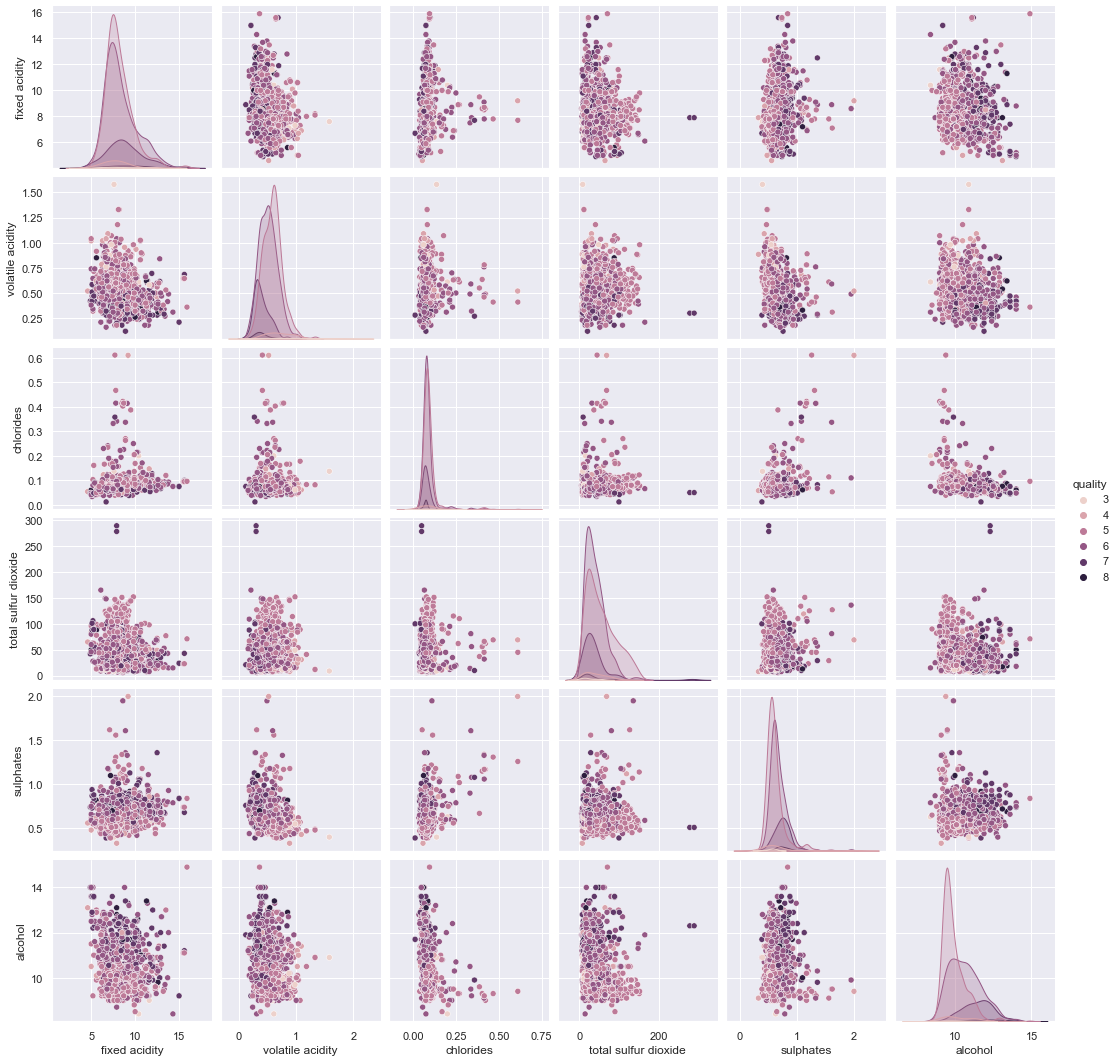

In [27]:
sns.pairplot(hue='quality',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

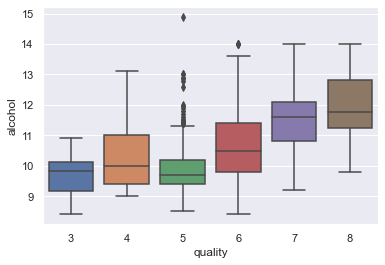

In [28]:
sns.boxplot(x='quality',y='alcohol',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

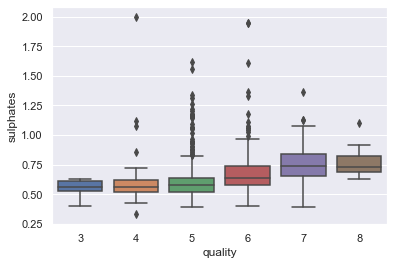

In [29]:
sns.boxplot(x='quality',y='sulphates',data=df)

In [30]:
df.loc[0]

fixed acidity            7.400
volatile acidity         0.700
chlorides                0.076
total sulfur dioxide    34.000
sulphates                0.560
alcohol                  9.400
quality                  5.000
Name: 0, dtype: float64

In [31]:
df.head(2)

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.076,34.0,0.56,9.4,5
1,7.8,0.88,0.098,67.0,0.68,9.8,5


In [32]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [33]:
X=df.drop(columns=['quality'],axis='columns')

In [34]:
y=df['quality']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [46]:
from collections import Counter

In [47]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train_ns,y_train_ns=oversample.fit_resample(X_train,y_train)
y_train.value_counts()

5    387
6    363
7    117
4     27
8     14
3      6
Name: quality, dtype: int64

In [54]:
params={'n_estimators':[130,110],'criterion':['gini','entropy'],'max_depth':[30,70,90],
        'min_samples_split':[3,4],'max_features':[6,5]}

In [55]:
rfc=RandomForestClassifier()

In [56]:
rfcv=GridSearchCV(rfc,params,scoring='accuracy',cv=10,n_jobs=-1)

In [57]:
rfcv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 70, 90], 'max_features': [6, 5],
                         'min_samples_split': [3, 4],
                         'n_estimators': [130, 110]},
             scoring='accuracy')

In [58]:
print("\n The best estimator across ALL searched params:\n",rfcv.best_estimator_)
print("\n The best score across ALL searched params:\n",rfcv.best_score_)
print("\n The best parameters across ALL searched params:\n",rfcv.best_params_)


 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=30, max_features=5, min_samples_split=3,
                       n_estimators=130)

 The best score across ALL searched params:
 0.6652412804586718

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 30, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 130}


In [42]:
rfc=RandomForestClassifier()

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_test_pred=rfc.predict(X_test)

In [53]:
accuracy_score(y_test,y_test_pred)

0.6855895196506551

In [37]:
xgb=XGBClassifier()

In [38]:
xgb.fit(X_train,y_train)

[13:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
y_test_pred=xgb.predict(X_test)

In [41]:
accuracy_score(y_test,y_test_pred)

0.62882096069869

In [60]:
features=['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']

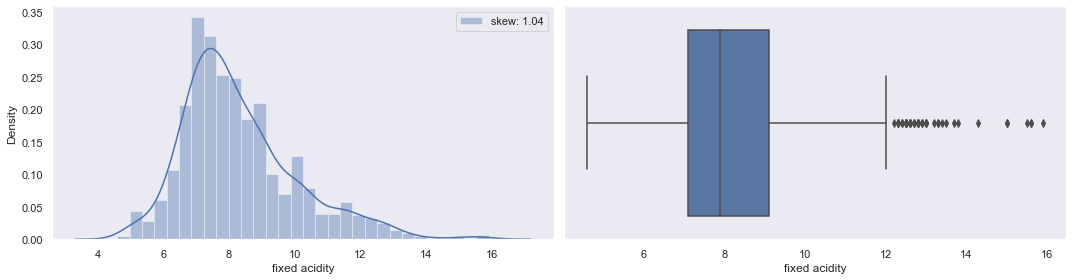

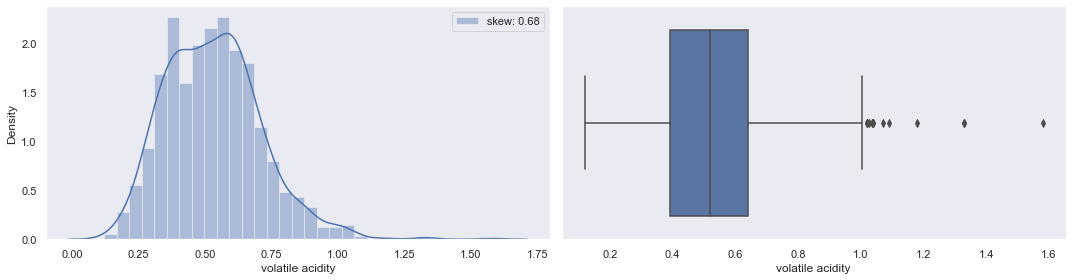

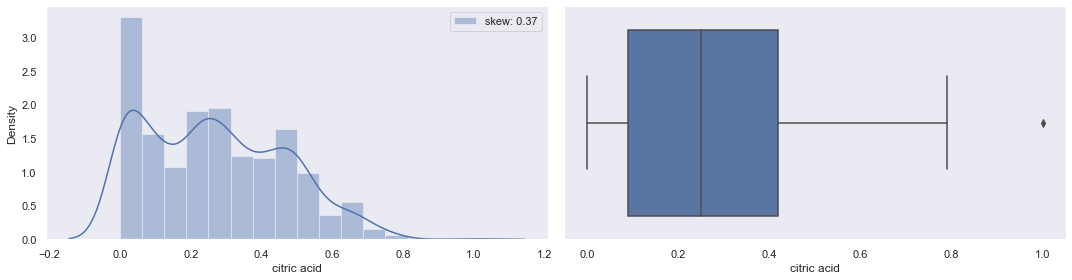

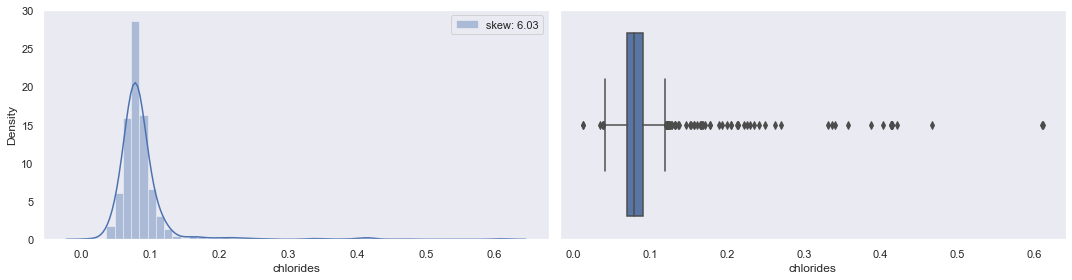

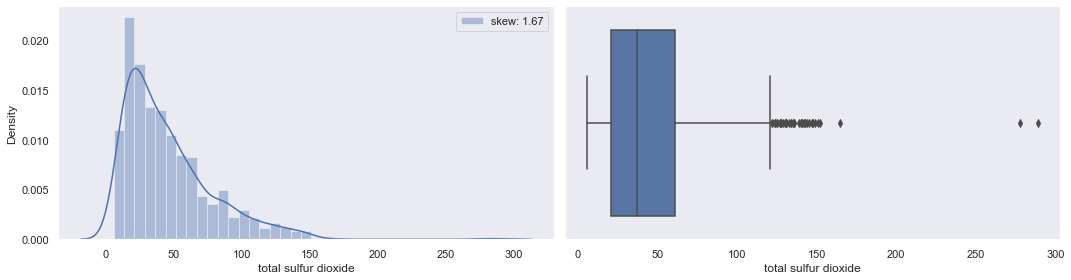

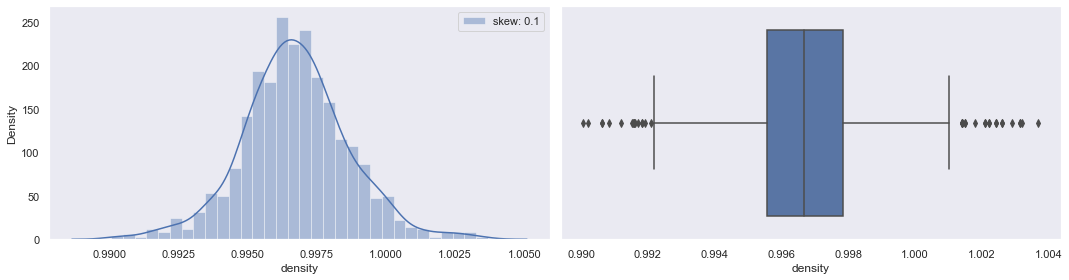

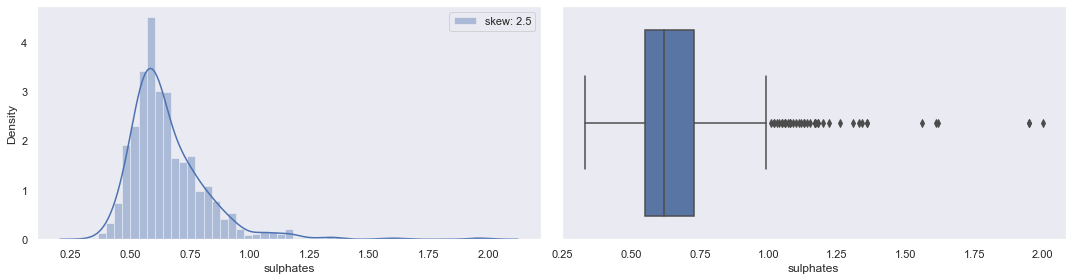

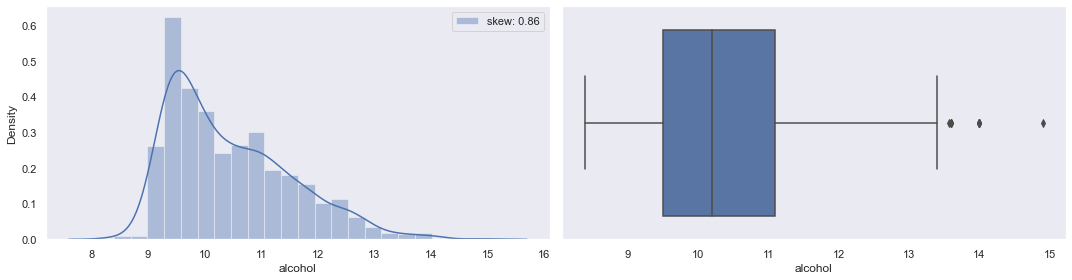

In [61]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [62]:
df_cap=df.copy()

In [63]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [64]:
iqr_capping(df_cap, features, 1.5)

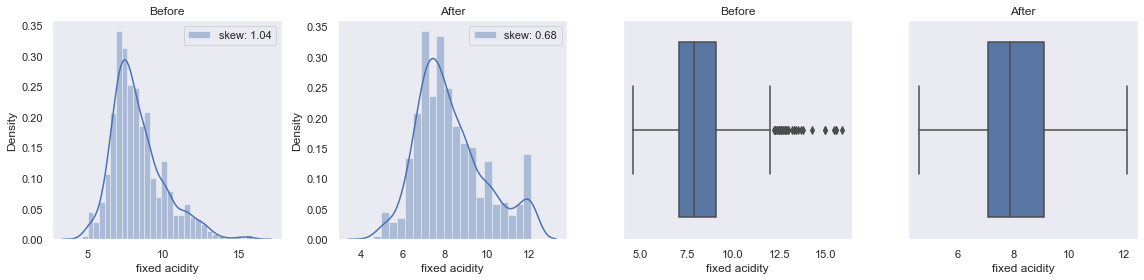

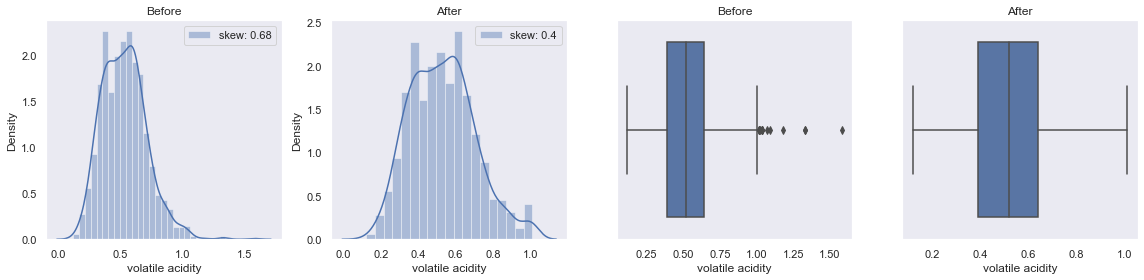

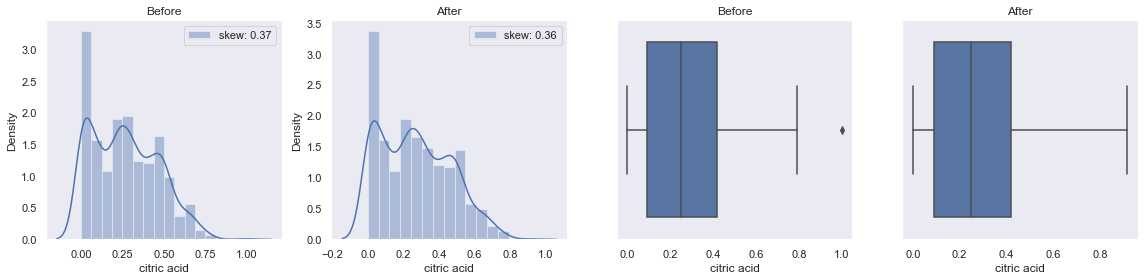

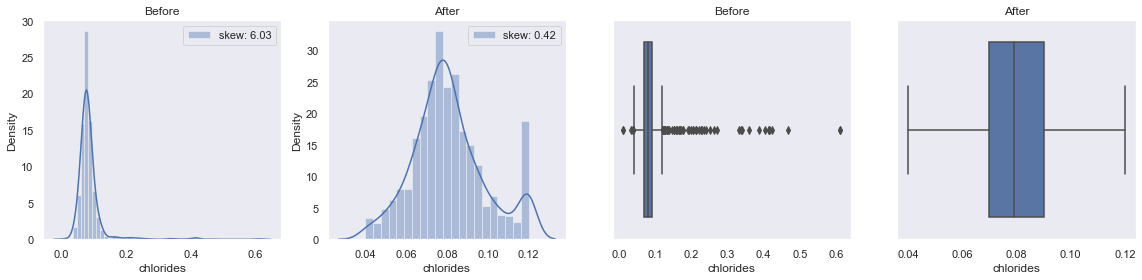

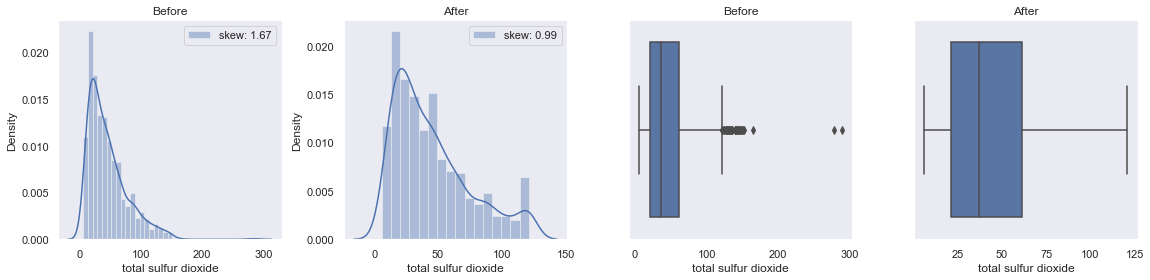

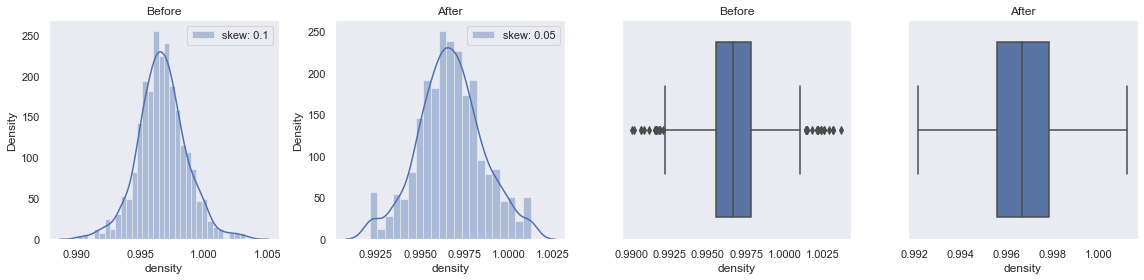

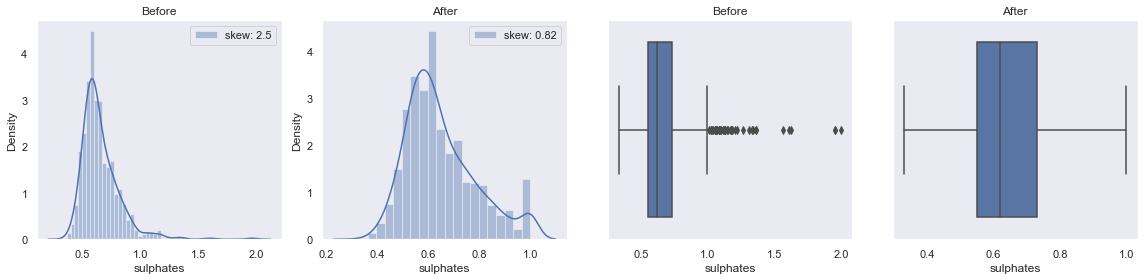

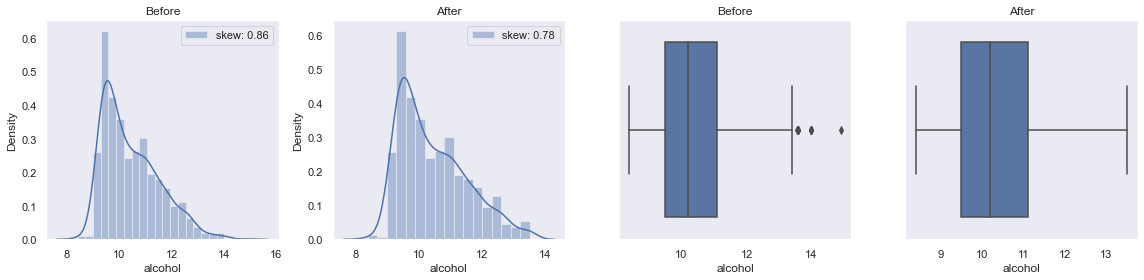

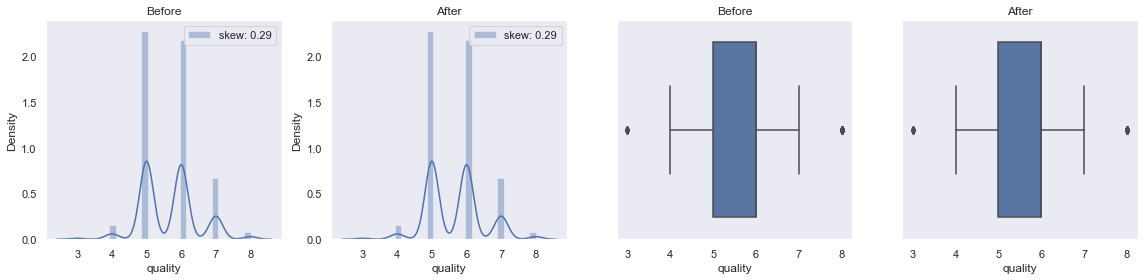

In [65]:
for col in df.columns:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [66]:
df_cap.head(1)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.7,0.0,0.076,34.0,0.9978,0.56,9.4,5


In [67]:
X=df_cap.drop(columns='quality',axis='columns')

In [68]:
y=df_cap['quality']

In [78]:
y.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
from imblearn.combine import SMOTETomek
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [74]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [91]:
# os=SMOTETomek("majority")
# X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
# print('Original dataset shape {}'.format(Counter(y_train)))
# print('Resampled dataset shape {}'.format(Counter(y_train_ns)))


# from imblearn.oversampling import SMOTE
# smote=SMOTE("minority")
# X,Y=smote.fit_sample(x_train,y_train)




from imblearn.over_sampling import SMOTE
oversample=SMOTE()
# print('Original dataset shape {}'.format(Counter(y_train)))
# print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

X_train_ns,y_train_ns=oversample.fit_resample(X_train,y_train)
y_train.value_counts()

5    387
6    363
7    117
4     27
8     14
3      6
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()

In [ ]:
X_train_ns=scale.fit_transform(X_train_ns)

In [ ]:
X_test=scale.transform(X_test)

In [1]:
X_train_ns

NameError: name 'X_train_ns' is not defined